<a href="https://colab.research.google.com/github/garciakm/proyecto-integrador/blob/main/educacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt:  que armae un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible values for columns
apellidos = ['Gonzalez', 'Rodriguez', 'Perez', 'Gomez', 'Lopez', 'Martinez', 'Sanchez', 'Fernandez', 'Garcia', 'Diaz']
nombres = ['Sofia', 'Mateo', 'Valentina', 'Santiago', 'Emma', 'Benjamin', 'Isabella', 'Lautaro', 'Mia', 'Thiago']
materias = ['Matemáticas', 'Lengua y Literatura', 'Ciencias Naturales', 'Ciencias Sociales', 'Historia', 'Geografía', 'Educación Física', 'Inglés', 'Música', 'Artes']

# Generate data
num_rows = 100
data = []
for _ in range(num_rows):
    apellido = random.choice(apellidos)
    nombre = random.choice(nombres)
    dni = random.randint(10000000, 99999999)  # Simulate DNI
    materia = random.choice(materias)
    nota1 = random.randint(1, 10)
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 20)
    data.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])

# Create the DataFrame
df = pd.DataFrame(data, columns=['Apellido', 'Nombre', 'DNI', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Display first few rows
print(df.head())

    Apellido     Nombre       DNI            Materia  Nota 1er Trimestre  \
0  Rodriguez   Isabella  72714434           Historia                   1   
1      Perez        Mia  38990888   Educación Física                   4   
2   Gonzalez   Benjamin  56310198   Educación Física                   6   
3      Gomez      Sofia  58890734  Ciencias Sociales                   4   
4       Diaz  Valentina  51461975              Artes                   3   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                   8                   1               11  
1                   9                   8               12  
2                   6                   7                9  
3                   5                   4               19  
4                   1                   7               11  


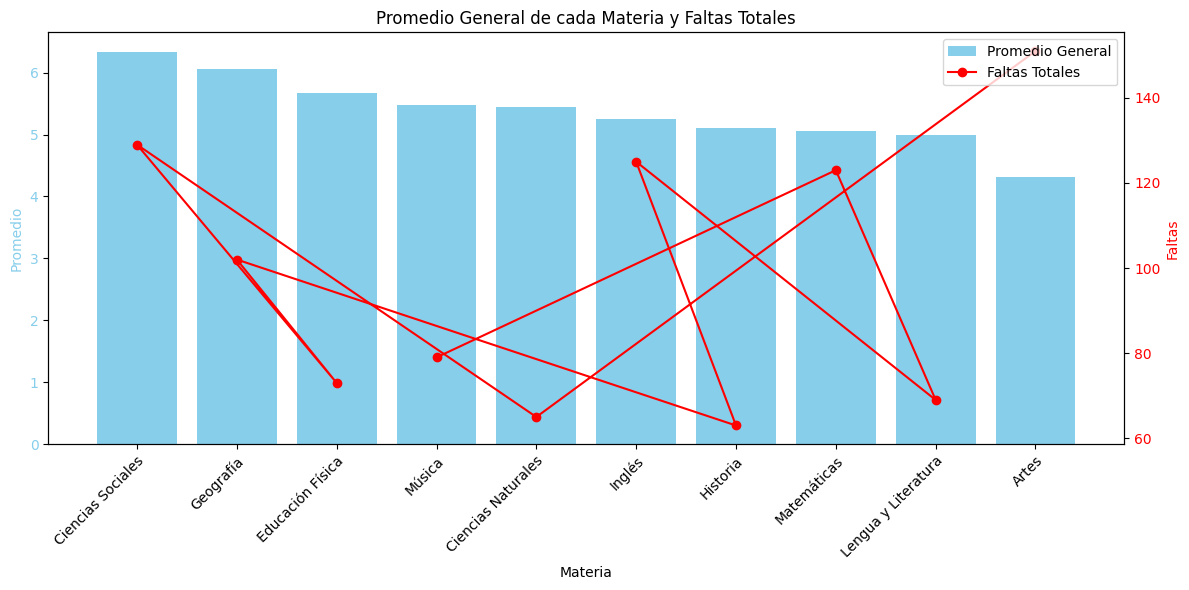

In [4]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average grade for each subject
average_grades = df.groupby('Materia')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)
average_grades = average_grades.sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia')['Faltas a clases'].sum()

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average grades
ax1.bar(average_grades.index, average_grades.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de cada Materia y Faltas Totales')

# Create a second y-axis for absences
ax2 = ax1.twinx()
ax2.plot(total_absences.index, total_absences.values, color='red', marker='o', label='Faltas Totales')
ax2.set_ylabel('Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')


# Display the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [5]:
df.to_csv("datos_alumnos.csv", index=False)